**Câu 1: (2 điểm)**
Cho ma trận $Q = \begin{bmatrix} 2 & 1 \\ 1 & 3 \end{bmatrix}$, vector $c = \begin{bmatrix} 1 \\ -2 \end{bmatrix}$, $a = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ và $b = 2$. Xét bài toán tối ưu:
\begin{gather*}
\min_{x \in \mathbb{R}^2} f(x) = \frac{1}{2} x^T Qx + c^T x \\
\text{subject to } a^T x = b
\end{gather*}

**a.** (1 điểm) Tìm điểm tối ưu $x^*$ của bài toán trên. 


**b.** (1 điểm) Tính giá trị tối ưu $f(x^*)$.





In [14]:
import numpy as np

# 1. Khai báo dữ liệu bài toán [cite: 3, 5, 6, 8]
Q = np.array([[2, 1], 
              [1, 3]])
c = np.array([1, -2])
a = np.array([1, 1])
b = 2

# 2. Thiết lập hệ phương trình KKT [cite: 9, 10]
# Hệ có dạng: [ Q  a ] [ x ] = [ -c ]
#             [ a^T 0 ] [ lambda ] = [ b ]
K = np.block([
    [Q, a.reshape(-1, 1)],
    [a.reshape(1, -1), 0]
])
rhs = np.concatenate([-c, [b]])

# 3. Giải hệ phương trình
sol = np.linalg.solve(K, rhs)
x_star = sol[:2]
lam_star = sol[2]

# 4. Tính giá trị tối ưu f(x*) = 1/2 x^T Q x + c^T x [cite: 9]
f_star = 0.5 * x_star.T @ Q @ x_star + c.T @ x_star
print(f"a. Điểm tối ưu x* = {x_star}")
print(f"b. Giá trị tối ưu f(x*) = {f_star:.4f}")

a. Điểm tối ưu x* = [0.33333333 1.66666667]
b. Giá trị tối ưu f(x*) = 1.8333


**Câu 2:** (4 điểm)  
Cho ma trận $P = \begin{bmatrix} 3 & 0 \\ 0 & 2 \end{bmatrix}$ và vector $q = \begin{bmatrix} 3 \\ -4 \end{bmatrix}$. Xét bài toán tối ưu sau:
\begin{equation}
\min_{x \in \mathbb{R}^2} f(x) = \frac{1}{2} x^T Px + q^T x + 2 \tag{1}
\end{equation}

**a.** (2 điểm) Xác định điểm tối ưu $x^*$ và giá trị tối ưu $p^*$ của bài toán (1).   
**b.** (1 điểm) Chuyển bài toán (1) về bài toán least square (bình phương tối thiểu) sau bằng cách chỉ ra ma trận $A$ và vector $b$:
\begin{equation}
\min_{x \in \mathbb{R}^2} \frac{1}{2} \|Ax - b\|_2^2 \tag{2}
\end{equation}
Biết rằng $A$ là ma trận đường chéo và vector $b$ có các thành phần là các số thực dương.   
**c.** (1 điểm) Sử dụng thuật toán Gradient Descent cho bài toán trên (bài toán (1) hoặc (2)), với giá trị $x$ ban đầu là $x^{(0)} = \begin{bmatrix} 1 \\ -2 \end{bmatrix}$, sử dụng learning rate lần lượt là $0.2$ và $0.6$ và thực hiện tối đa 100 vòng lặp.   
In ra giá trị của $x^{(k)}$, $f(x^{(k)})$ tương ứng sau mỗi vòng lặp $k$ và vẽ đồ thị biểu thị cho sai số $|f(x^{(k)}) - p^*|$ trong cả hai trường hợp của learning rate. Từ đó hãy đưa ra kết luận về sự hội tụ của thuật toán Gradient Descent trong từng trường hợp.

a. Điểm tối ưu x* = [-1.  2.]
   Giá trị tối ưu p* = -3.5
b. Ma trận A (đường chéo):
[[-1.73205081  0.        ]
 [ 0.          1.41421356]]
   Vector b (thành phần dương): [1.73205081 2.82842712]

Chạy GD với Learning Rate = 0.2:
Vòng lặp  1: x = [-0.2 -0.4], f(x) = 3.220000
Vòng lặp  2: x = [-0.68  0.56], f(x) = -1.272800
Vòng lặp  3: x = [-0.872  1.136], f(x) = -2.728928
Vòng lặp  4: x = [-0.9488  1.4816], f(x) = -3.227329
Vòng lặp  5: x = [-0.97952  1.68896], f(x) = -3.402625
Vòng lặp  6: x = [-0.991808  1.813376], f(x) = -3.465071
Vòng lặp  7: x = [-0.9967232  1.8880256], f(x) = -3.487446
Vòng lặp  8: x = [-0.99868928  1.93281536], f(x) = -3.495484
Vòng lặp  9: x = [-0.99947571  1.95968922], f(x) = -3.498375
Vòng lặp 10: x = [-0.99979028  1.97581353], f(x) = -3.499415
Vòng lặp 11: x = [-0.99991611  1.98548812], f(x) = -3.499789
Vòng lặp 12: x = [-0.99996645  1.99129287], f(x) = -3.499924
Vòng lặp 13: x = [-0.99998658  1.99477572], f(x) = -3.499973
Vòng lặp 14: x = [-0.99999463  1.9

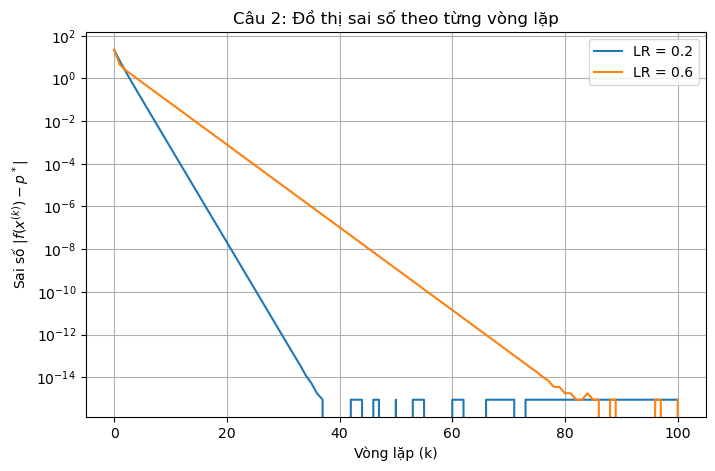

In [13]:

import matplotlib.pyplot as plt

P = np.array([[3, 0], 
              [0, 2]])
q = np.array([3, -4])

# Định nghĩa hàm mục tiêu và gradient [cite: 18]
def f(x):
    return 0.5 * x.T @ P @ x + q.T @ x + 2

def grad_f(x):
    return P @ x + q

# a. Xác định điểm tối ưu x* và giá trị tối ưu p* bằng giải tích [cite: 19]
x_star = -np.linalg.inv(P) @ q
p_star = f(x_star)
print(f"a. Điểm tối ưu x* = {x_star}")
print(f"   Giá trị tối ưu p* = {p_star}")

# b. Chuyển về bài toán Least Square: 1/2 ||Ax - b||^2 [cite: 20, 22]
# Điều kiện: A đường chéo, b có các thành phần thực dương [cite: 24]
A_ls = np.diag([-np.sqrt(3), np.sqrt(2)]) 
b_ls = np.array([np.sqrt(3), 2*np.sqrt(2)]) 

print(f"b. Ma trận A (đường chéo):\n{A_ls}")
print(f"   Vector b (thành phần dương): {b_ls}")

# c. Thuật toán Gradient Descent [cite: 25]
def gradient_descent_c2(lr, iterations, x_init):
    x = x_init.copy()
    x_history = [x]
    f_history = [f(x)]
    
    print(f"\nChạy GD với Learning Rate = {lr}:")
    for k in range(1, iterations + 1):
        x = x - lr * grad_f(x)
        x_history.append(x)
        f_history.append(f(x))
        # In ra sau mỗi vòng lặp k theo yêu cầu [cite: 26]
        print(f"Vòng lặp {k:2}: x = {x}, f(x) = {f_history[-1]:.6f}")
            
    return np.array(x_history), np.array(f_history)

x0 = np.array([1.0, -2.0]) # [cite: 25]
iters = 100

x_h2_02, f_h2_02 = gradient_descent_c2(0.2, iters, x0)
x_h2_06, f_h2_06 = gradient_descent_c2(0.6, iters, x0)

# Vẽ đồ thị sai số |f(x^k) - p*| [cite: 26]
plt.figure(figsize=(8, 5))
plt.plot(range(iters + 1), np.abs(f_h2_02 - p_star), label='LR = 0.2')
plt.plot(range(iters + 1), np.abs(f_h2_06 - p_star), label='LR = 0.6')
plt.yscale('log')
plt.xlabel('Vòng lặp (k)')
plt.ylabel('Sai số $|f(x^{(k)}) - p^*|$')
plt.title('Câu 2: Đồ thị sai số theo từng vòng lặp')
plt.legend()
plt.grid(True)
plt.show()

**Câu 3: (4 điểm)**  
Sử dụng lại bài toán (1) ở Câu 2 với ma trận $P = \begin{bmatrix} 3 & 0 \\ 0 & 2 \end{bmatrix}$, vector $q = \begin{bmatrix} 3 \\ -4 \end{bmatrix}$:
\begin{equation}
\min_{x \in \mathbb{R}^2} f(x) = \frac{1}{2} x^T Px + q^T x + 2 \tag{1}
\end{equation}

**a.** (2 điểm) Sử dụng thuật toán Gradient Descent cho bài toán trên, với giá trị $x$ ban đầu là $x^{(0)} = \begin{bmatrix} 1 \\ -2 \end{bmatrix}$, sử dụng learning rate lần lượt là $0.2$ và $0.6$ và thực hiện tối đa 100 vòng lặp.   
In ra giá trị của $x^{(k)}$, $f(x^{(k)})$ tương ứng sau mỗi 10 vòng lặp và vẽ đồ thị biểu thị sai số $|f(x^{(k)}) - p^*|$ trong cả hai trường hợp của learning rate.   
**b.** (2 điểm) Vẽ đồ thị quỹ đạo hội tụ (contour plot) cho cả hai learning rate và đưa ra kết luận về sự hội tụ của thuật toán Gradient Descent trong từng trường hợp.




--- GD với LR = 0.2 (In mỗi 10 vòng) ---
Lần lặp  10: x = [-0.99979028  1.97581353], f(x) = -3.499415
Lần lặp  20: x = [-0.99999998  1.99985375], f(x) = -3.500000
Lần lặp  30: x = [-1.          1.99999912], f(x) = -3.500000
Lần lặp  40: x = [-1.          1.99999999], f(x) = -3.500000
Lần lặp  50: x = [-1.  2.], f(x) = -3.500000
Lần lặp  60: x = [-1.  2.], f(x) = -3.500000
Lần lặp  70: x = [-1.  2.], f(x) = -3.500000
Lần lặp  80: x = [-1.  2.], f(x) = -3.500000
Lần lặp  90: x = [-1.  2.], f(x) = -3.500000
Lần lặp 100: x = [-1.  2.], f(x) = -3.500000

--- GD với LR = 0.6 (In mỗi 10 vòng) ---
Lần lặp  10: x = [-0.78525164  1.99999959], f(x) = -3.430825
Lần lặp  20: x = [-0.97694157  2.        ], f(x) = -3.499202
Lần lặp  30: x = [-0.99752412  2.        ], f(x) = -3.499991
Lần lặp  40: x = [-0.99973415  2.        ], f(x) = -3.500000
Lần lặp  50: x = [-0.99997146  2.        ], f(x) = -3.500000
Lần lặp  60: x = [-0.99999694  2.        ], f(x) = -3.500000
Lần lặp  70: x = [-0.99999967  2.   

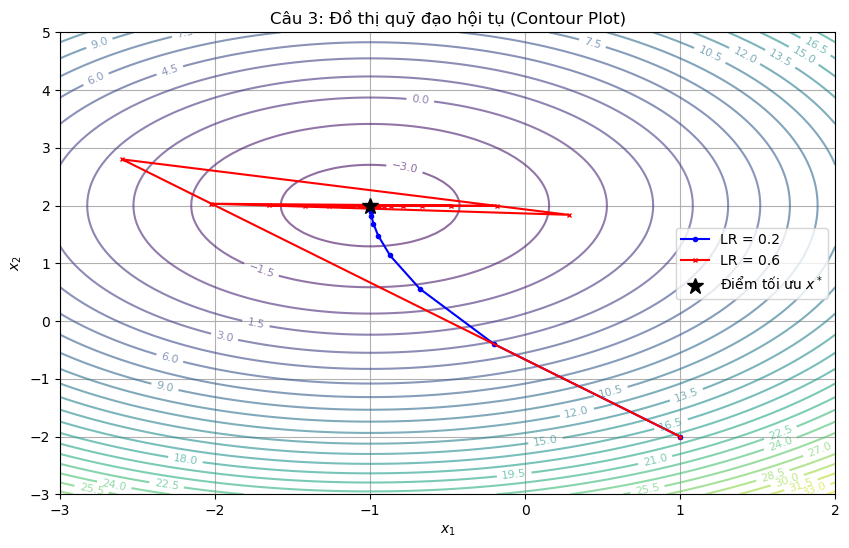


Kết luận về sự hội tụ:
- LR 0.2: Hội tụ ổn định và mượt mà về điểm tối ưu.
- LR 0.6: Hội tụ có hiện tượng dao động (zigzag) mạnh do bước nhảy lớn.


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Tái sử dụng dữ liệu và hàm từ Câu 2 [cite: 29, 31]
P = np.array([[3, 0], [0, 2]])
q = np.array([3, -4])
x_star = np.array([-1.0, 2.0])
p_star = -3.5

def f(x):
    return 0.5 * x.T @ P @ x + q.T @ x + 2

def grad_f(x):
    return P @ x + q

# a. Gradient Descent in mỗi 10 vòng lặp [cite: 33, 35]
def gradient_descent_c3(lr, iterations, x_init):
    x = x_init.copy()
    x_history = [x]
    f_history = [f(x)]
    
    print(f"\n--- GD với LR = {lr} (In mỗi 10 vòng) ---")
    for k in range(1, iterations + 1):
        x = x - lr * grad_f(x)
        x_history.append(x)
        f_history.append(f(x))
        if k % 10 == 0:
            print(f"Lần lặp {k:3}: x = {x}, f(x) = {f_history[-1]:.6f}")
    return np.array(x_history), np.array(f_history)

x0 = np.array([1.0, -2.0])
iters = 100

x_h3_02, f_h3_02 = gradient_descent_c3(0.2, iters, x0)
x_h3_06, f_h3_06 = gradient_descent_c3(0.6, iters, x0)

# b. Vẽ đồ thị quỹ đạo hội tụ (Contour Plot) [cite: 36]
plt.figure(figsize=(10, 6))

# Tạo lưới để vẽ các đường mức (contour)
x1_range = np.linspace(-3, 2, 100)
x2_range = np.linspace(-3, 5, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = 0.5 * (3*X1**2 + 2*X2**2) + 3*X1 - 4*X2 + 2

# Vẽ các đường mức
cp = plt.contour(X1, X2, Z, levels=25, cmap='viridis', alpha=0.6)
plt.clabel(cp, inline=True, fontsize=8)

# Vẽ quỹ đạo hội tụ của hai learning rate
plt.plot(x_h3_02[:, 0], x_h3_02[:, 1], 'o-', markersize=3, color='blue', label='LR = 0.2')
plt.plot(x_h3_06[:, 0], x_h3_06[:, 1], 'x-', markersize=3, color='red', label='LR = 0.6')
plt.plot(x_star[0], x_star[1], 'k*', markersize=12, label='Điểm tối ưu $x^*$')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Câu 3: Đồ thị quỹ đạo hội tụ (Contour Plot)')
plt.legend()
plt.grid(True)
plt.show()

# Kết luận [cite: 36]
print("\nKết luận về sự hội tụ:")
print("- LR 0.2: Hội tụ ổn định và mượt mà về điểm tối ưu.")
print("- LR 0.6: Hội tụ có hiện tượng dao động (zigzag) mạnh do bước nhảy lớn.")

**Câu 1 (3 điểm)** Một xưởng may sản xuất hai loại sản phẩm: áo và quần. Để sản xuất một chiếc áo cần 2 giờ
cắt vải và 3 giờ may, thu được lợi nhuận 120000 đồng. Để sản xuất một chiếc quần cần 3 giờ cắt vải và 2 giờ may,
thu được lợi nhuận 150000 đồng. Xưởng có tổng cộng 120 giờ cắt vải và 100 giờ may trong một tuần. Ngoài ra,
số lượng áo sản xuất không vượt quá 30 chiếc và số lượng quần không vượt quá 25 chiếc. Bài toán đặt ra là xác
định số lượng áo và quần cần sản xuất để đạt lợi nhuận tối đa.
a) (1 điểm) Hãy lập mô hình tối ưu của bài toán trên theo dạng dưới đây, bằng cách chỉ ra hàm mục tiêu f0,
ma trận A và vector b.
minimize f0(x),
subject to Ax ≤ b.
b) (2 điểm) Sử dụng thư viện thích hợp để giải bài toán trên.

In [ ]:
import cvxpy as cp
import numpy as np

# 1. Định nghĩa biến số (x1, x2)
x = cp.Variable(2)

# 2. Thiết lập ma trận A và vector b
A = np.array([
    [2, 3],   # Giờ cắt vải
    [3, 2],   # Giờ may
    [1, 0],   # Giới hạn áo
    [0, 1],   # Giới hạn quần
    [-1, 0],  # x1 >= 0
    [0, -1]   # x2 >= 0
])
b = np.array([120, 100, 30, 25, 0, 0])

# 3. Hàm mục tiêu (Minimize f0)
# Tương đương với Maximize lợi nhuận
c = np.array([-120000, -150000])
objective = cp.Minimize(c @ x)

# 4. Ràng buộc
constraints = [A @ x <= b]

# 5. Giải bài toán
prob = cp.Problem(objective, constraints)
prob.solve()

# In kết quả
print(f"Số lượng áo cần sản xuất (x1): {x.value[0]:.2f}")
print(f"Số lượng quần cần sản xuất (x2): {x.value[1]:.2f}")
print(f"Lợi nhuận tối đa đạt được: {-prob.value:,.0f} VNĐ")

--- KẾT QUẢ TỐI ƯU CỦA BÀI TOÁN ---
Điểm tối ưu x* = (0.195899, -2.999999)
Giá trị tối ưu p* = 1.401359
-----------------------------------

Đang chạy Gradient Descent với learning rate = 0.3333333333333333:
  Vòng lặp   0: x = (-2.0000, 4.0000), f(x) = 37.135335, sai số = 3.57e+01
  Vòng lặp  20: x = (nan, -2.9979), f(x) = nan, sai số = nan
  Vòng lặp  40: x = (nan, -3.0000), f(x) = nan, sai số = nan
  Vòng lặp  60: x = (nan, -3.0000), f(x) = nan, sai số = nan
  Vòng lặp  80: x = (nan, -3.0000), f(x) = nan, sai số = nan
  Vòng lặp 100: x = (nan, -3.0000), f(x) = nan, sai số = nan

Đang chạy Gradient Descent với learning rate = 0.4:
  Vòng lặp   0: x = (-2.0000, 4.0000), f(x) = 37.135335, sai số = 3.57e+01
  Vòng lặp  20: x = (nan, -2.9997), f(x) = nan, sai số = nan
  Vòng lặp  40: x = (nan, -3.0000), f(x) = nan, sai số = nan
  Vòng lặp  60: x = (nan, -3.0000), f(x) = nan, sai số = nan
  Vòng lặp  80: x = (nan, -3.0000), f(x) = nan, sai số = nan
  Vòng lặp 100: x = (nan, -3.0000), f(x)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23976\1002430909.py:11: RuntimeWarning: overflow encountered in exp
  return np.exp(x1) + term_dist
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23976\1002430909.py:16: RuntimeWarning: overflow encountered in exp
  df_dx1 = np.exp(x1) + 4*(2*x1 - 1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23976\1002430909.py:53: RuntimeWarning: invalid value encountered in subtract
  x_k = x_k - lr * grad_f(x_k)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23976\1002430909.py:10: RuntimeWarning: overflow encountered in scalar power
  term_dist = 0.5 * ((2*x1 - 1)**2 + (-x2 - 3)**2)


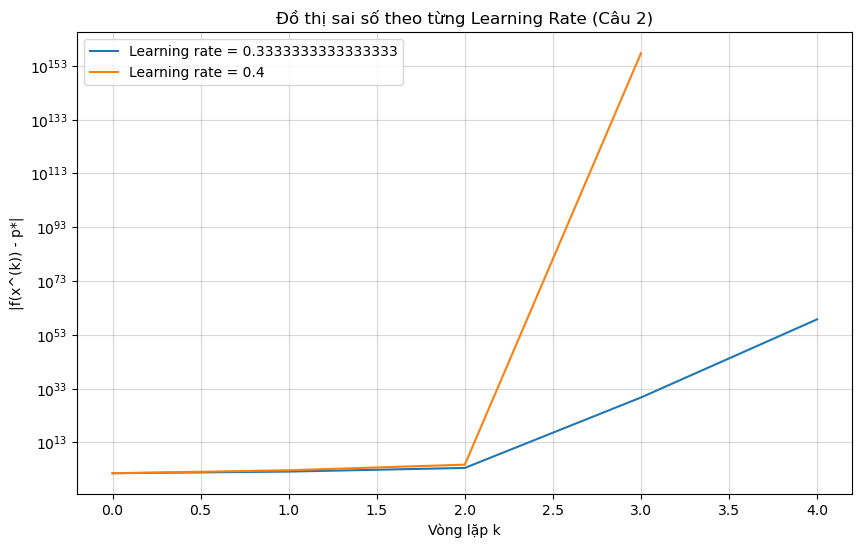

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 1. Định nghĩa hàm mục tiêu từ đề bài [cite: 19]
# f(x) = e^x1 + 0.5 * ||Ax - b||^2
def f(x):
    x1, x2 = x[0], x[1]
    # A = [[2, 0], [0, -1]], b = [1, 3] [cite: 16, 17]
    term_dist = 0.5 * ((2*x1 - 1)**2 + (-x2 - 3)**2)
    return np.exp(x1) + term_dist

# 2. Định nghĩa Gradient của hàm f 
def grad_f(x):
    x1, x2 = x[0], x[1]
    df_dx1 = np.exp(x1) + 4*(2*x1 - 1)
    df_dx2 = x2 + 3
    return np.array([df_dx1, df_dx2])

# --- BƯỚC QUAN TRỌNG: TÌM ĐIỂM TỐI ƯU x* TRƯỚC ---
# Sử dụng solver để tìm giá trị chính xác tuyệt đối làm mốc so sánh 
res = minimize(f, x0=[0, 0], method='BFGS')
x_star = res.x
p_star = res.fun

print("--- KẾT QUẢ TỐI ƯU CỦA BÀI TOÁN ---")
print(f"Điểm tối ưu x* = ({x_star[0]:.6f}, {x_star[1]:.6f})")
print(f"Giá trị tối ưu p* = {p_star:.6f}")
print("-" * 35)

# 3. Thuật toán Gradient Descent [cite: 21, 22]
x0 = np.array([-2.0, 4.0]) # Điểm khởi tạo [cite: 21]
learning_rates = [1/3, 2/5] # Các mức learning rate đề bài yêu cầu [cite: 21, 22]
max_iter = 100

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    x_k = x0.copy()
    errors = []
    print(f"\nĐang chạy Gradient Descent với learning rate = {lr}:")
    
    for k in range(max_iter + 1):
        fk = f(x_k)
        err = abs(fk - p_star)
        errors.append(err)
        
        # In giá trị sau mỗi vòng lặp k theo yêu cầu 
        if k % 20 == 0: 
            print(f"  Vòng lặp {k:3}: x = ({x_k[0]:.4f}, {x_k[1]:.4f}), f(x) = {fk:.6f}, sai số = {err:.2e}")
        
        # Cập nhật x theo Gradient Descent
        x_k = x_k - lr * grad_f(x_k)
    
    plt.plot(errors, label=f'Learning rate = {lr}')

# 4. Vẽ đồ thị biểu thị sai số 
plt.yscale('log')
plt.xlabel('Vòng lặp k')
plt.ylabel('|f(x^(k)) - p*|')
plt.title('Đồ thị sai số theo từng Learning Rate (Câu 2)')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()

--- KẾT QUẢ TỐI ƯU ---
Điểm tối ưu x*: [0.17993622 0.17993629 0.17993619]
Giá trị tối ưu p*: -2.174292


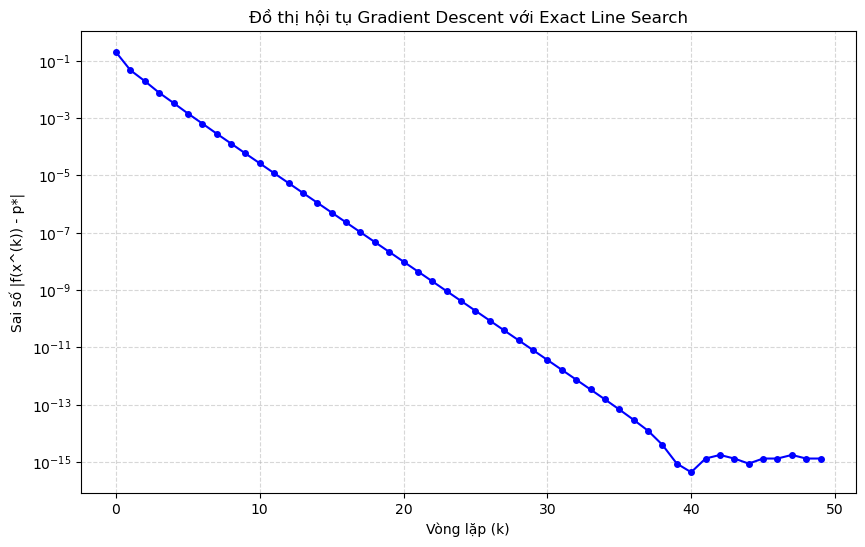

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, minimize_scalar

# 1. Dữ liệu từ đề bài [cite: 27, 29, 30]
A = np.array([
    [1, 0, 0, -1],
    [0, 1, 0, -1],
    [0, 0, 1, -1]
])
b = np.array([2, 2, 2, 1])
c = np.array([0.1, 0.1, 0.1])
x0 = np.array([0.0, 1.0, 0.0]) # Điểm khởi tạo 

# 2. Định nghĩa hàm mục tiêu f(x) [cite: 25]
def f(x):
    slacks = b - A.T @ x
    if np.any(slacks <= 0):
        return 1e18 # Barrier khi x nằm ngoài miền xác định
    return c @ x - np.sum(np.log(slacks))

# 3. Định nghĩa Gradient f(x) 
def grad_f(x):
    slacks = b - A.T @ x
    return c + A @ (1.0 / slacks)

# --- BƯỚC 1: TÌM GIÁ TRỊ TỐI ƯU p* ĐỂ LÀM MỐC [cite: 31] ---
res_opt = minimize(f, x0, method='L-BFGS-B', tol=1e-12)
x_star = res_opt.x
p_star = res_opt.fun

print("--- KẾT QUẢ TỐI ƯU ---")
print(f"Điểm tối ưu x*: {x_star}")
print(f"Giá trị tối ưu p*: {p_star:.6f}")

# --- BƯỚC 2: GRADIENT DESCENT VỚI EXACT LINE SEARCH  ---
x_k = x0.copy()
errors = []
max_iter = 50

for k in range(max_iter):
    fk = f(x_k)
    errors.append(abs(fk - p_star)) # Tính sai số err_k 
    
    gk = grad_f(x_k)
    
    # Tìm max_step để x_k - step*gk vẫn nằm trong miền xác định
    s = b - A.T @ x_k
    d = A.T @ gk
    upper_bounds = [-s[i]/d[i] for i in range(len(d)) if d[i] < 0]
    max_step = min(upper_bounds) if upper_bounds else 1.0
    
    # Exact Line Search tìm step_size tối ưu 
    res_line = minimize_scalar(lambda step: f(x_k - step * gk), 
                               bounds=(0, max_step * 0.99), 
                               method='bounded')
    step_size = res_line.x
    
    # Cập nhật x
    x_k = x_k - step_size * gk

# --- BƯỚC 3: VẼ ĐỒ THỊ SAI SỐ  ---
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, 'b-o', markersize=4)
plt.yscale('log')
plt.xlabel('Vòng lặp (k)')
plt.ylabel('Sai số |f(x^(k)) - p*|')
plt.title('Đồ thị hội tụ Gradient Descent với Exact Line Search')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()